In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
X_train = pd.read_csv("Diabetes_XTrain.csv").values
Y_train = pd.read_csv("Diabetes_YTrain.csv").values
X_test = pd.read_csv("Diabetes_Xtest.csv").values
Y_sample = pd.read_csv("sample_submission.csv")
Y_train = Y_train.reshape(576)
print(X_train.shape)
print(Y_train.shape)

(576, 8)
(576,)


In [50]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query,k=20):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(query,X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]

    vals = np.array(vals)

    new_vals = np.unique(vals[:,1],return_counts = True)
    index = new_vals[1].argmax()
    pred = int(new_vals[0][index])
    return pred

In [51]:
predict = []
for i in range(X_test.shape[0]):
    predict.append(knn(X_train,Y_train,X_test[i]))
print(predict)
predict = pd.DataFrame({'Outcome':predict})
print(predict)
predict.to_csv('predict.csv',index = False)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
     Outcome
0          0
1          0
2          0
3          0
4          0
5          0
6          1
7          0
8          0
9          0
10         1
11         0
12         1
13         0
14         0
15         0
16         0
17         1
18         1
19         1
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
..       ...
162    

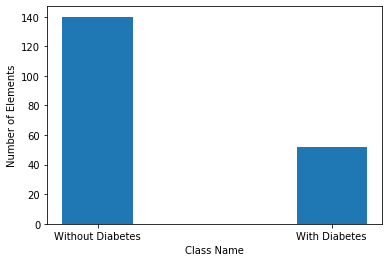

In [52]:
class_name = ['Without Diabetes','With Diabetes']
x_values = [0,1]
elements = np.unique(predict,return_counts = True)[1]
plt.ylabel('Number of Elements')
plt.xlabel('Class Name')
plt.bar(x_values,elements,width=0.3,tick_label=class_name)
plt.show()